### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


#### What is the independent variable? What is the dependent variable?

Independent variable is **congruency**, and the Dependent variable is **time**

---

#### What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

$H_{0} : T_{congruent} = T_{incongruent}$

$H_{1} : T_{congruent} < T_{incongruent}$

where $T_{congruent}$ is the mean time it takes to say the color when the color and word is congruent, and $T_{incongruent}$ is the mean time it takes to say the color when the color and word is incongruent.

Our null hypothesis begins with equivalence; we assume that there is no difference in the time it takes to say the color whether it is congruent or incongruent. Our alternative is what we want to prove, which is that it takes longer to say the color when the color and word is incongruent.

I propose performing a *paired T-Test* to find the mean of the differences between the two samples, since each person is represented in both the congruent and incongruent sample.

---

#### Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [140]:
df = pd.read_csv('stroopdata.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [141]:
df['TimeDifference'] = df['Congruent'] - df['Incongruent']
df.head()

,Congruent,Incongruent,TimeDifference
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134


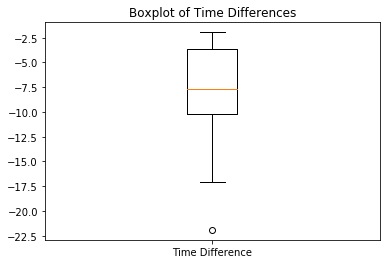

In [142]:
#Check for outliers
plt.boxplot(df['TimeDifference']);
plt.xticks([1], ['Time Difference']);
plt.title('Boxplot of Time Differences');

In [143]:
#Remove the one outlier
df.sort_values('TimeDifference')[:1]

,Congruent,Incongruent,TimeDifference
19,12.369,34.288,-21.919


In [144]:
df.drop([19], inplace=True)

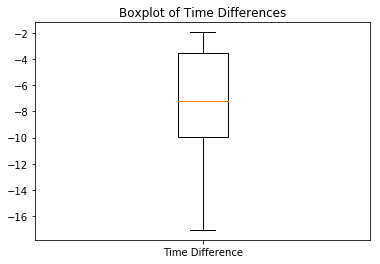

In [145]:
#Check for outliers
plt.boxplot(df['TimeDifference']);
plt.xticks([1], ['Time Difference']);
plt.title('Boxplot of Time Differences');

In [146]:
n = df.count()[0]
n

23

In [147]:
mean_congruent = df['Congruent'].mean()
mean_congruent

14.12426086956522

In [148]:
mean_incongruent = df['Incongruent'].mean()
mean_incongruent

21.482347826086958

In [149]:
df['TimeDifference'].mean()

-7.358086956521738

In [150]:
df['TimeDifference'].std()

3.937837580484584

Basic statistical observations:
- In our boxplot, we saw that there was one outlier, so we removed that sample from our analysis.
- The mean time for congruent and incongruent is 14.124 seconds and 21.482 seconds respectively.
- Further statistics reveal the observed mean difference and standard deviation to to be -7.358 seconds and 3.938 seconds respectively.
- We have a sample size of 23 participants, a proper amount to conduct a T-Test (vs Z-Test, which requires a large enough sample for a normal distribution).

---

#### Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

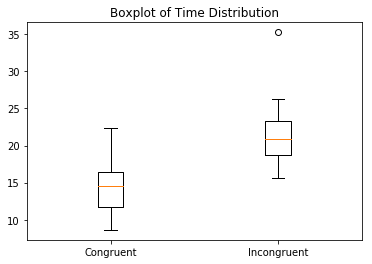

In [151]:
plt.boxplot([df['Congruent'], df['Incongruent']]);
plt.xticks([1,2], ['Congruent', 'Incongruent']);
plt.title('Boxplot of Time Distribution');

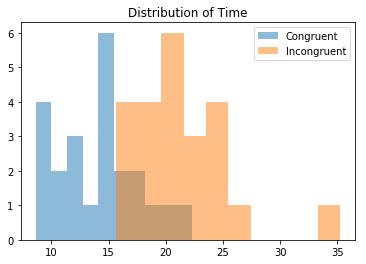

In [152]:
plt.hist(df['Congruent'], alpha=.5);
plt.hist(df['Incongruent'], alpha=.5);
plt.legend(["Congruent", "Incongruent"]);
plt.title('Distribution of Time');

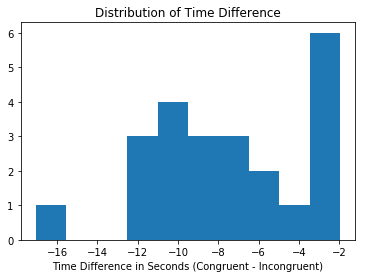

In [153]:
plt.hist(df['TimeDifference']);
plt.title('Distribution of Time Difference');
plt.xlabel('Time Difference in Seconds (Congruent - Incongruent)');

- The distributions show that mean times for congruent is less than the mean times for incongruent
- Similarly, we observe that all our results for the time difference are negative, meaning that for each test, it took people more time to read the incongruent words than congruent words.

#### Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

We will performed a paired T-Test, finding the mean of the time differences between each congruent and incongruent samples.

In [161]:
#1. Calculate the mean of the differences
mean_diff = df['TimeDifference'].mean()
mean_diff

-7.358086956521738

In [162]:
#2. Calculate the standard error of the mean differences
df['TimeDifference'].std(), n**.5

(3.937837580484584, 4.7958315233127191)

In [168]:
se_diff = df['TimeDifference'].std() / n**.5
se_diff

0.82109589574667208

In [169]:
#3. Calculate t-value
t_val = mean_diff / se_diff
t_val

-8.9613003726325839

#### Using the one-tail T-Test with n=23 (22 DF), our T-statistic is 8.961, which far exceeds the criticial value of 3.792. This gives us a p-value of less than .0001, so we have a greater than 99.99% likelihood that our statistic fails outside the null hypothesis, so *we will strongly reject the null hypothesis.*

This is not surprising to discover, as it is intuitive to think that it would take longer for the mind to the incongruent words (a word of a color whose color was a different color than the word itself). This mind-trick test performed as I would have expected.

---
Resources Acknowledged:

- Computing T-Test Scores: https://www.universalclass.com/articles/math/statistics/student-t-tests-ii.htm
- T-Test Table: http://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf
- Standard Errors: http://support.minitab.com/en-us/minitab/17/topic-library/basic-statistics-and-graphs/hypothesis-tests/tests-of-means/what-is-the-standard-error-of-the-mean/